<a href="https://colab.research.google.com/github/haribharadwaj/notebooks/blob/main/CSD2045/Generate_click_ABR_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This notebook generates random, but realistic click ABR data

This is intended for pedagogical purposes where new relistic ABR waveforms can be generated. The generated waveforms can be used for practicing identifiction of stereotypical ABR features.


The first time you run the code, the notebook will download the statistical parameters needed from Hari's archives into your virtual colab server space, and plot a randomly generated example. For every following run, because the downloaded parameters should still be available until you disconnect from Colab, the code will just generate a different random example and plot.

The code is designed to mark up to 10 most prominent peaks. These may or may not coincide with prototypical ABR peaks because the goal here is to practice identification by seeing lots of examples, some of which will be anomalous.  For each example, see if you can answer the following questions:

* Which (if any) of the marked peaks would you identify as wave V of the ABR response?
* Which (if any) of the peaks would you identify as wave I of the ABR response?
* Which (if any) of those peaks would you identify as wave III of the ABR response?

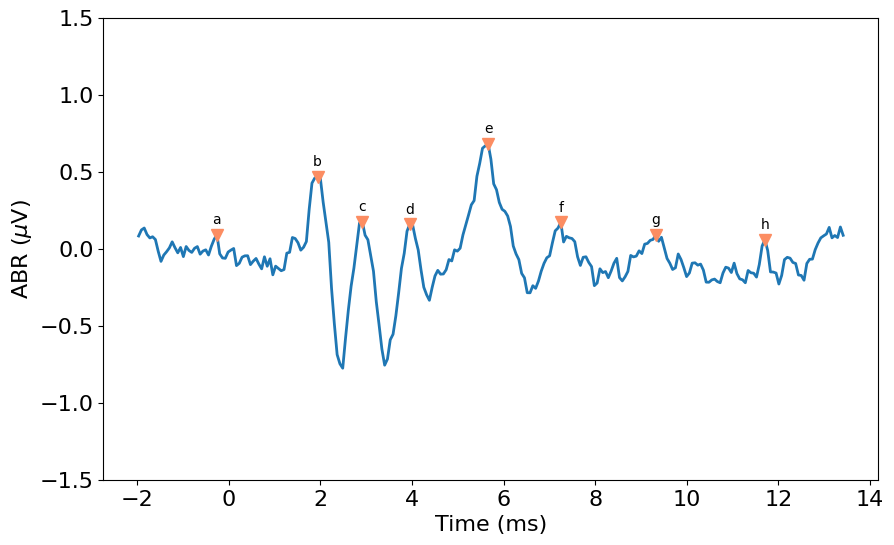

In [8]:
#@title This section generates the ABR waveforms an marks the 10 most prominent peaks (without regard to whether they are standard ABR waves).
import os
from scipy import io
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

file_path = 'ABRstats.mat'
url = 'https://www.dropbox.com/scl/fi/zazt21nnxdfpylrofi2ct/ABRstats.mat?rlkey=ziofh1dwctjtzg08c9466nujh&dl=1'  # URL to download the file if it does not exist

# Check if the file exists
if not os.path.exists(file_path):
    # If the file does not exist, download it using wget
    !wget -O {file_path} {url}



# Load some statistical parameters to generate ABRs from
dat = io.loadmat('ABRstats.mat')

m = dat['m'].squeeze()
C = dat['C'].squeeze()
t = dat['t'].squeeze()

tooWeird = True


while tooWeird:
  x = np.random.multivariate_normal(m, C)


  # Find peaks that have a prominence of at least some p_threshold
  p_threshold = max(abs(x)) * 0.2
  peaks, properties = find_peaks(x, prominence=p_threshold)

  # See how many prominent peaks in the wave I range
  peaks_w1, properties_w1 = find_peaks(x[np.logical_and(t > 0, t < 3)], prominence=p_threshold)

  # See how many prominent peaks in the wave III-V range
  peaks_w35, properties_w35 = find_peaks(x[np.logical_and(t > 3, t < 7)], prominence=p_threshold)

  if len(peaks_w1) > 1 or len(peaks_w35) > 2:
    tooWeird = True
  else:
    tooWeird = False


# Sort peaks by their prominence, highest first, and select the top 10
top_peaks = peaks[np.argsort(properties["prominences"])[-10:]]

# Plot x against t with a horizontally long aspect ratio

width_in = 5
height_in = 2
mpl.rcParams["figure.figsize"] = (width_in, height_in)

col = [252/255., 141/255., 98/255.]  # From colorbrewer
plt.figure(figsize=(10, 6))
plt.plot(t, x, linewidth=2)

# Mark the peaks and label them
for i, peak in enumerate(sorted(top_peaks)):
    plt.plot(t[peak], x[peak], "v", markersize=8, color=col)
    plt.text(t[peak], x[peak] + 0.05, chr(97+i),
             verticalalignment='bottom', horizontalalignment='center')

plt.xlabel('Time (ms)', fontsize=16)
plt.ylabel(r'ABR ($\mu$V)', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.ylim([-1.5, 1.5])
plt.show()